<a href="https://colab.research.google.com/github/Justus3031/HEALTHCARE-PROJECT/blob/main/Hep_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Study Objectives:
To determine the prevalence of Hepatitis B among people who inject drugs (PWIDs).

To identify sociodemographic and behavioral predictors associated with Hepatitis B infection in PWIDs.

To assess the relationship between injection practices and Hepatitis B infection status.

To evaluate the impact of knowledge and access to healthcare services on Hepatitis B outcomes in PWIDs.

To provide evidence-based recommendations for targeted Hepatitis B prevention among PWIDs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Hep B Predictors in PWIDs.xlsx')

In [ ]:
df.head()

,ID. No.,LGA,Age,Sex,Marital Status,Level of Education,Religion,Occupation,"If employed, type of work",Living Presently,...,Have sexual partners not spouse in the last 3 months,"If yes, How many",Who are sexual partners,Use condom consistently in the past 1 month when having sex,Use condom in last intercourse with spouse or partner,use condom in last intercourse with someone other than spouse/partner,Accepted Testing during study,Result of Testing,Received Result,Number of doses of HBV
0,1,Ifako Ijaiye,27,Male,Married,NaN,Islam,Self-employed,NR,Rented Apart,...,Yes,3,Female,No,Yes,Yes,Yes,Positive,Yes,0.0
1,2,Ifako Ijaiye,22,Female,Married,Secondary,Islam,Self-employed,NR,Own House,...,Yes,More than 3,Male,No,Yes,Yes,Yes,Negative,Yes,1.0
2,3,Ifako Ijaiye,31,Female,Single,NaN,Christianity,Unemployed,NaN,Rented Apart,...,Yes,More than 3,Male,No,Yes,No,Yes,Negative,Yes,1.0
3,4,Ifako Ijaiye,43,Female,Single,Prmary,Christianity,Unemployed,NaN,Rented Apart,...,Yes,More than 3,Male,No,Yes,No,Yes,Negative,Yes,1.0
4,5,Ifako Ijaiye,28,Male,Single,NaN,Islam,Unemployed,NaN,Rented Apart,...,Yes,More than 3,Female,No,Yes,Yes,Yes,Negative,Yes,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 55 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   ID. No.                                                                                       269 non-null    int64  
 1   LGA                                                                                           268 non-null    object 
 2   Age                                                                                           269 non-null    int64  
 3   Sex                                                                                           269 non-null    object 
 4   Marital Status                                                                                269 non-null    object 
 5   Level of Education           

In [ ]:
df.describe()

,ID. No.,Age,How long injecting drugs if >6 months (Years),Age at first inject drugs,How many months ago received treatment for drug use,Number of doses of HBV
count,269.000000,269.000000,267.000000,268.000000,0.0,268.000000
mean,146.825279,30.602230,4.691011,24.708955,NaN,2.205224
std,83.537792,7.912403,4.376386,7.434936,NaN,1.094270
min,1.000000,16.000000,0.750000,7.000000,NaN,0.000000
25%,76.000000,25.000000,2.000000,19.000000,NaN,1.000000
50%,148.000000,29.000000,3.000000,23.000000,NaN,3.000000
75%,218.000000,37.000000,5.000000,29.000000,NaN,3.000000
max,300.000000,56.000000,25.000000,45.000000,NaN,3.000000


In [ ]:
# --- Unique Values in Categorical Columns ---
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in LGA:
['Ifako Ijaiye ' 'Ojo' nan 'OJo']

Unique values in Sex:
['Male' 'Female']

Unique values in Marital Status:
['Married' 'Single' 'Divorced']

Unique values in Level of Education :
[nan 'Secondary' 'Prmary' 'Tertiary' 'Post-Tertiary' 'P' 'Primary']

Unique values in Religion:
['Islam' 'Christianity' 'Traditional']

Unique values in Occupation:
['Self-employed' 'Unemployed' 'Employed']

Unique values in If employed, type of work:
['NR' nan 'Trader' 'Business' 'Sale girl' 'Carpenter' 'Engineer']

Unique values in Living Presently:
['Rented Apart' 'Own House' 'With friends' 'Relatives' 'Homeless']

Unique values in If homeless, how long:
[nan 'Homeless more than 3 months']

Unique values in Ever been in Prison:
['No' 'Yes']

Unique values in If yes, number of times:
[nan 'Once' 'NR' 'One' 'No']

Unique values in Why imprisoned:
[nan 'NS' 'NR']

Unique values in Ever been arrested:
['No' 'Yes']

Unique values in Knowledge:
['Poor' 'Poor ']

Unique values in Attitude:


In [ ]:
df.isnull().sum()

,0
ID. No.,0
LGA,1
Age,0
Sex,0
Marital Status,0
Level of Education,72
Religion,0
Occupation,0
"If employed, type of work",178
Living Presently,0


In [ ]:
df.dtypes

,0
ID. No.,int64
LGA,object
Age,int64
Sex,object
Marital Status,object
Level of Education,object
Religion,object
Occupation,object
"If employed, type of work",object
Living Presently,object


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
264,False
265,False
266,False
267,False


In [ ]:
df.duplicated().sum()

np.int64(0)

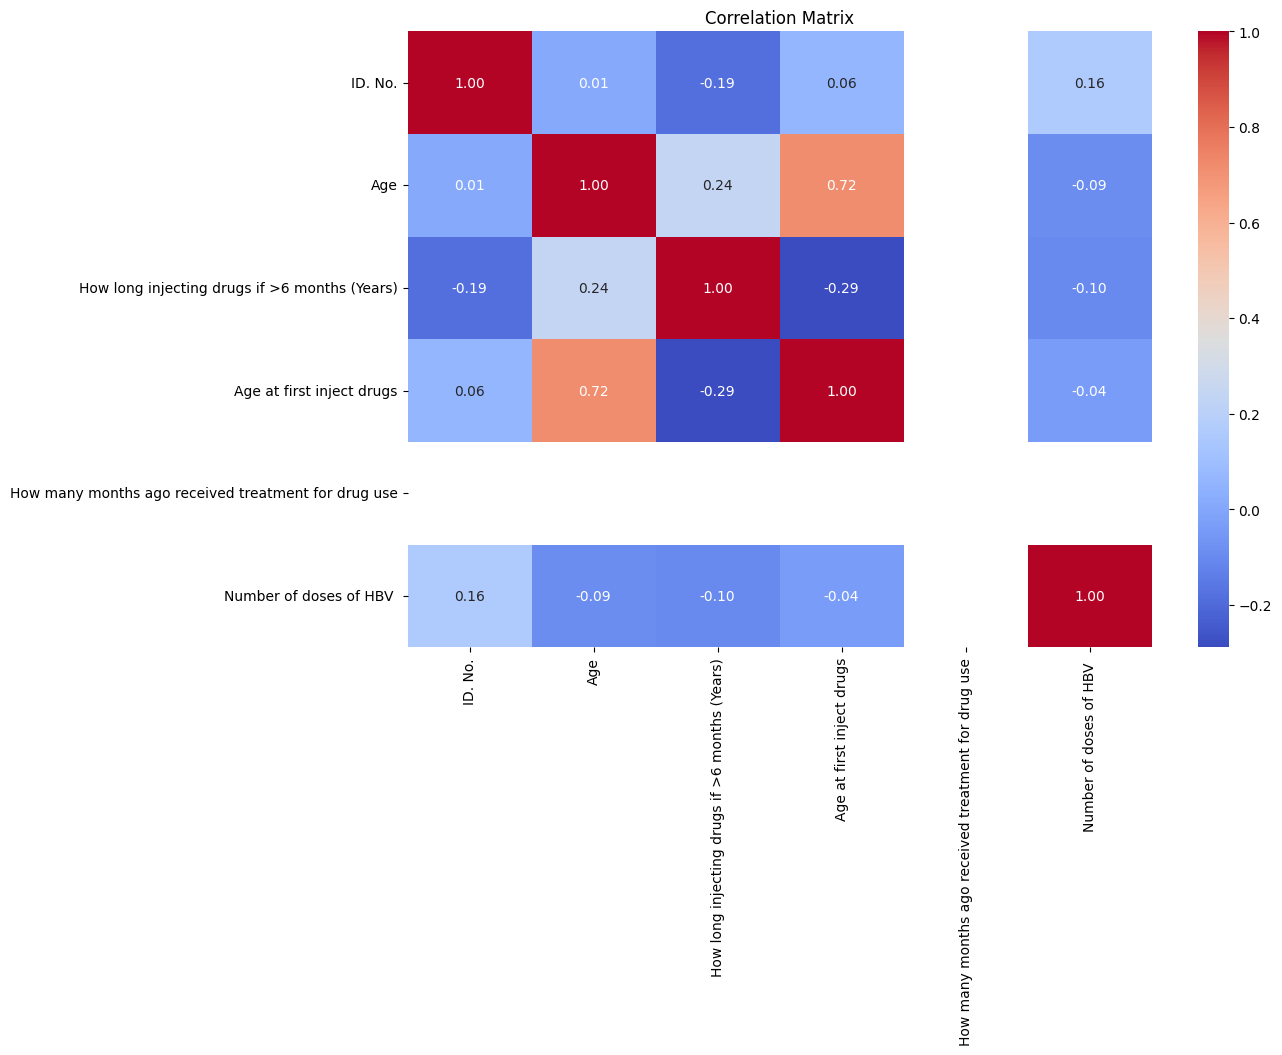

In [ ]:
# --- Correlation Heatmap (Numerical Columns) ---
plt.figure(figsize=(12,8))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

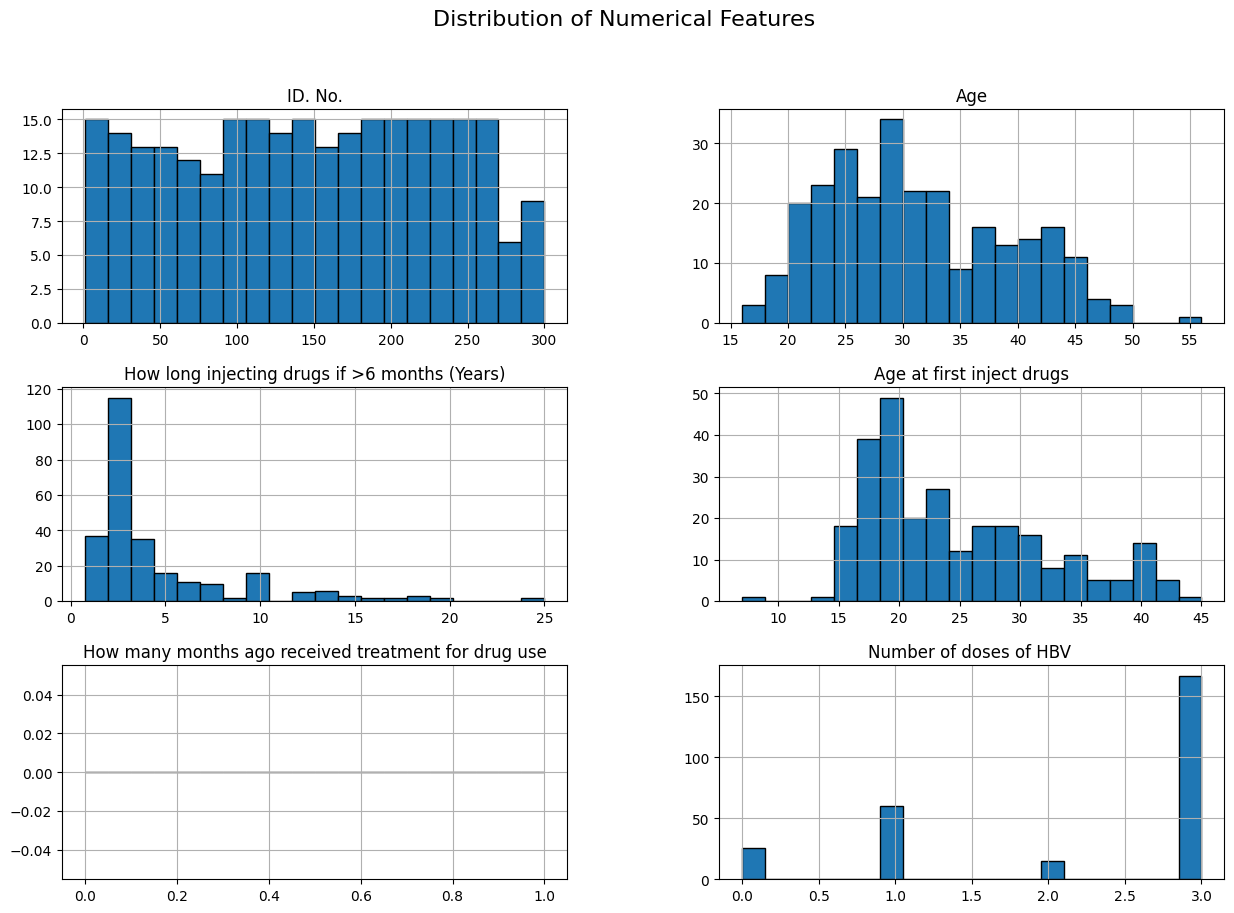

In [ ]:
# --- Histograms for Numerical Variables ---
numerical_df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


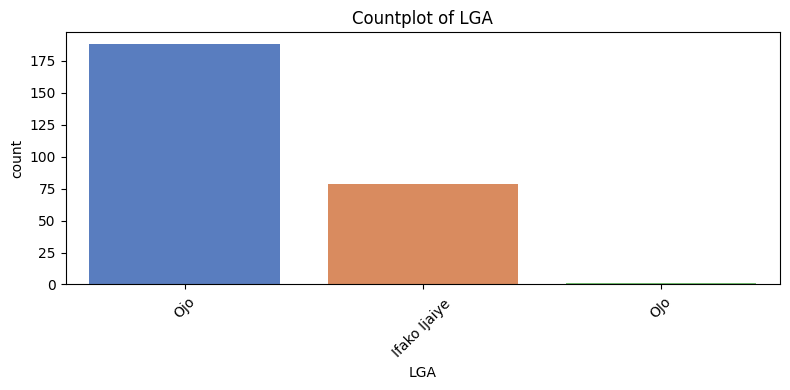

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


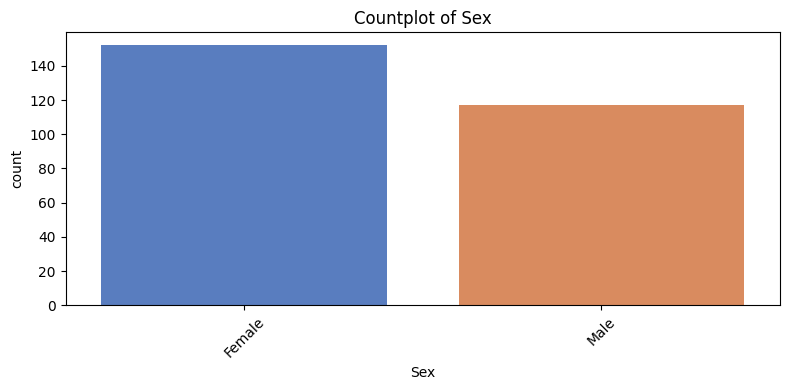

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


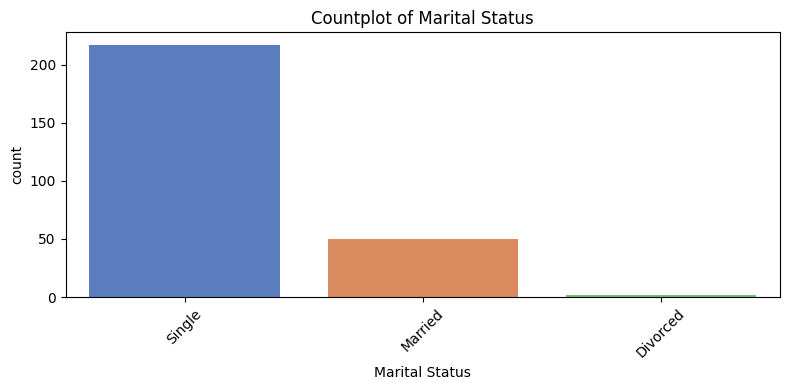

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


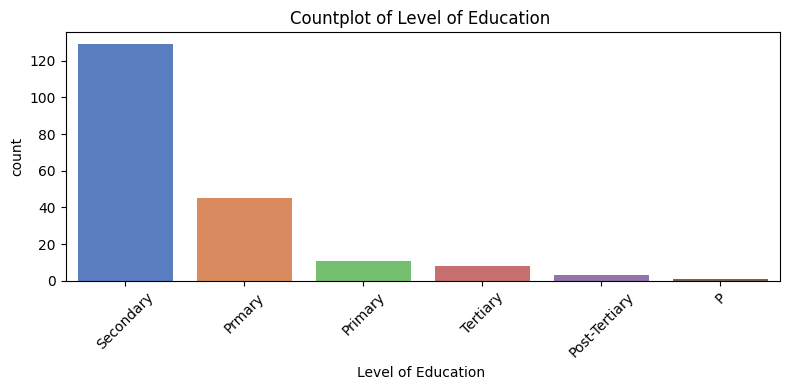

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


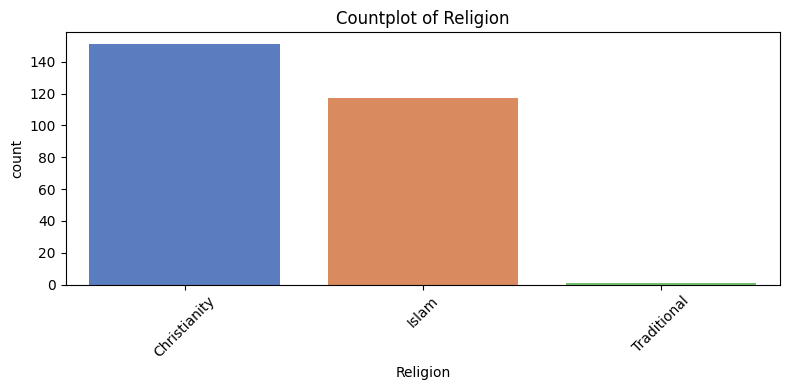

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


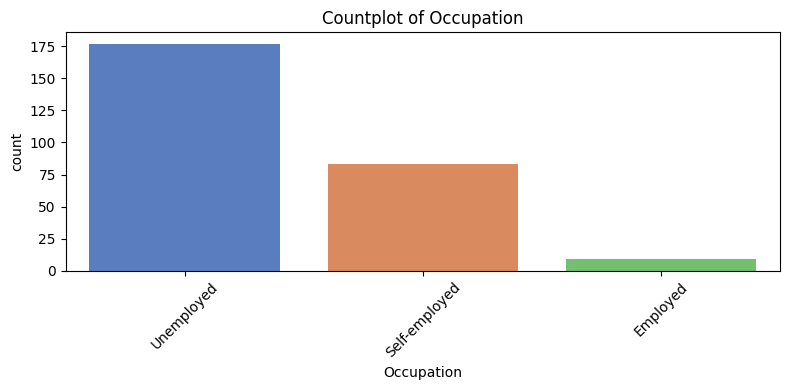

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


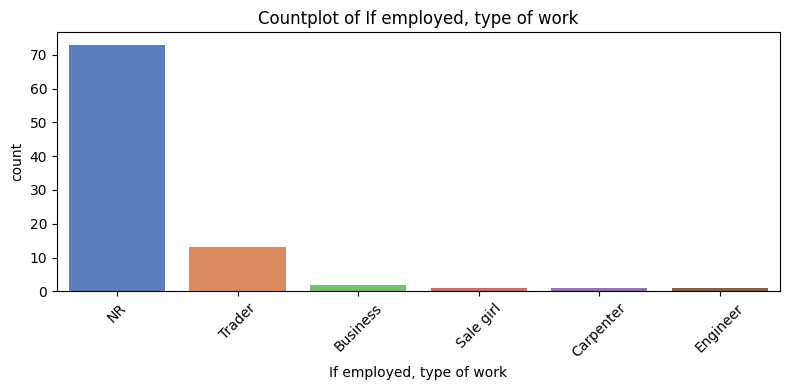

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


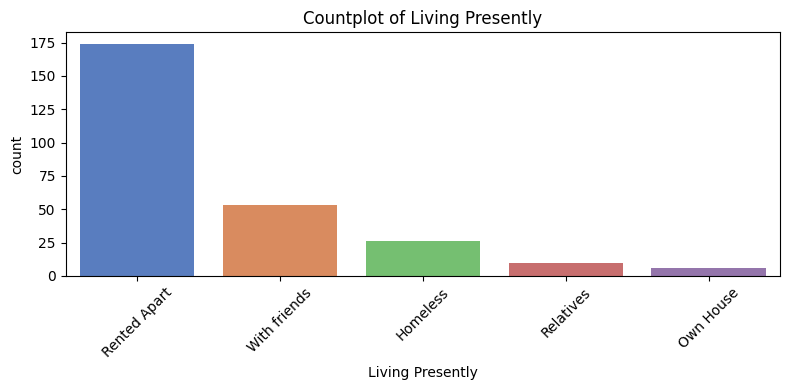

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


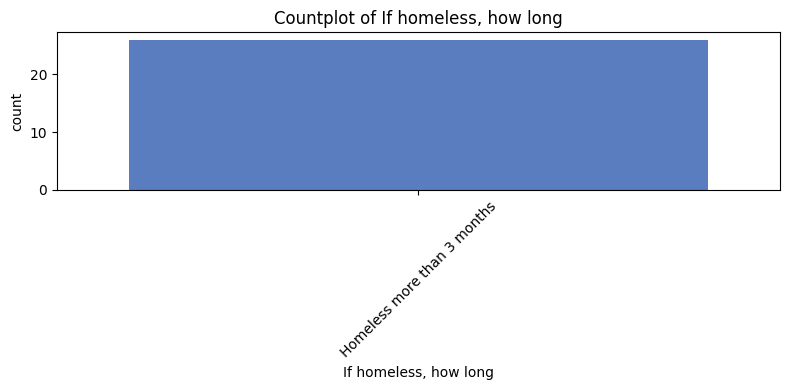

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


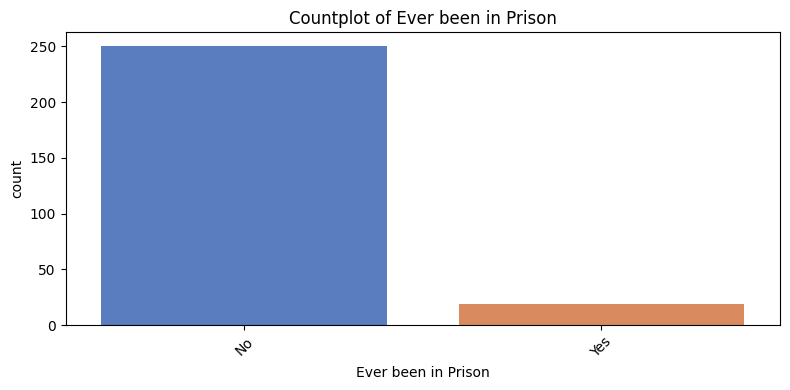

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


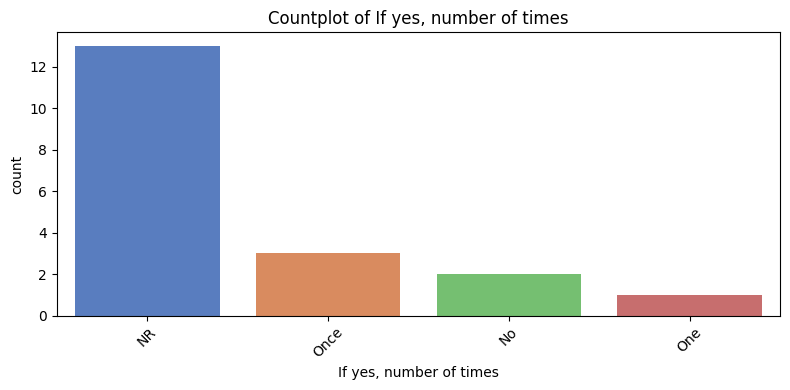

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


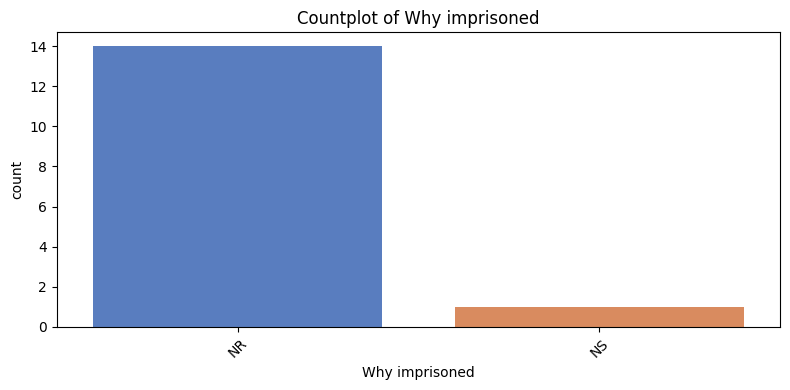

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


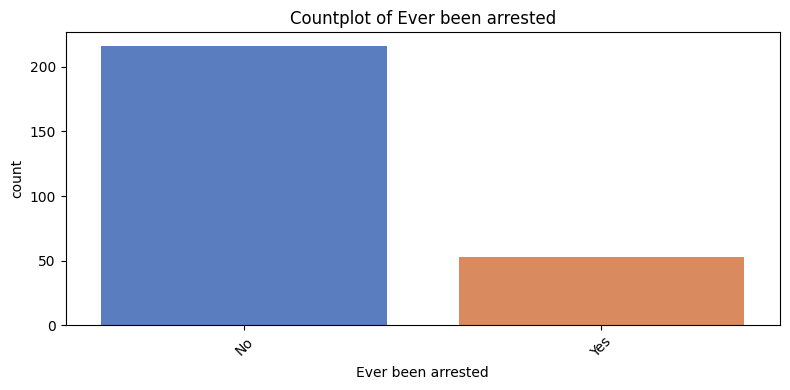

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


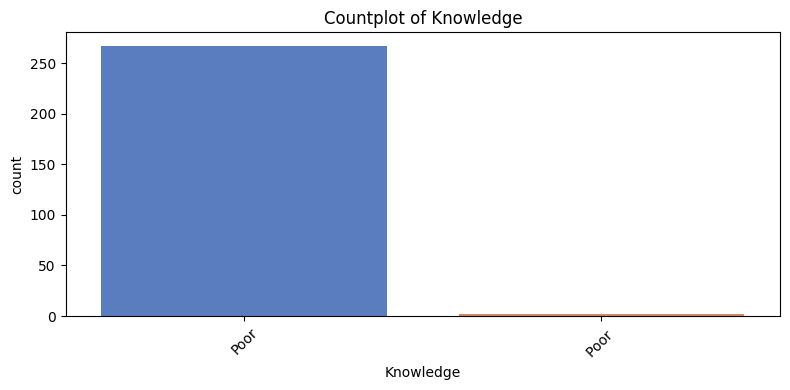

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


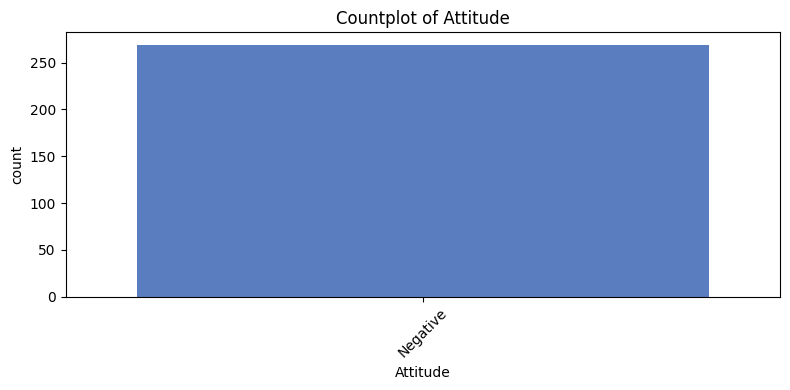

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


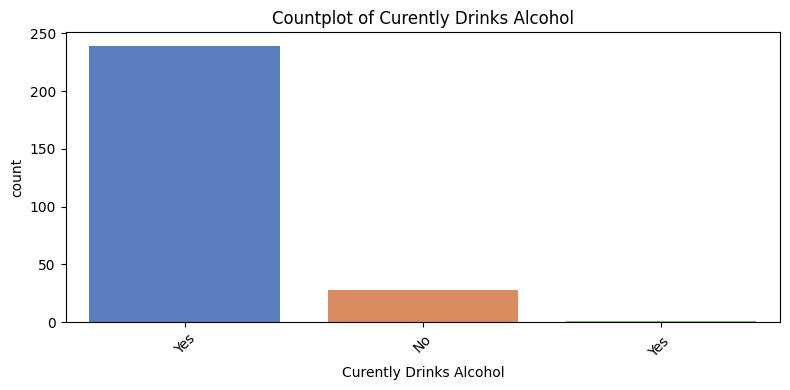

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


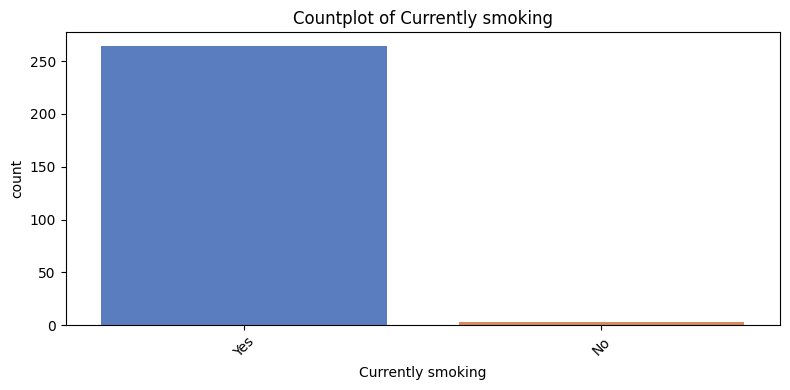

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


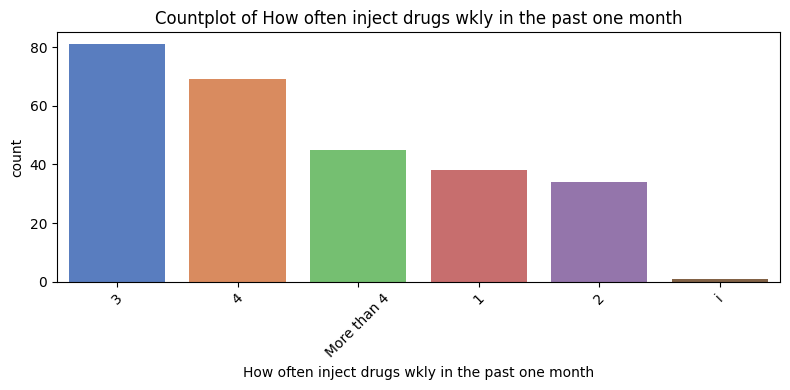

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


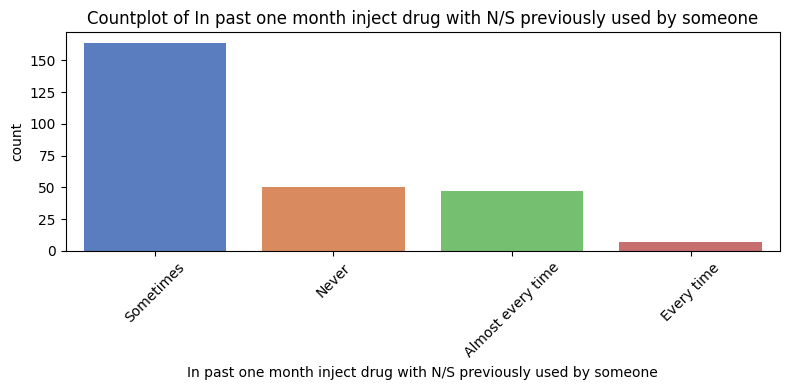

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


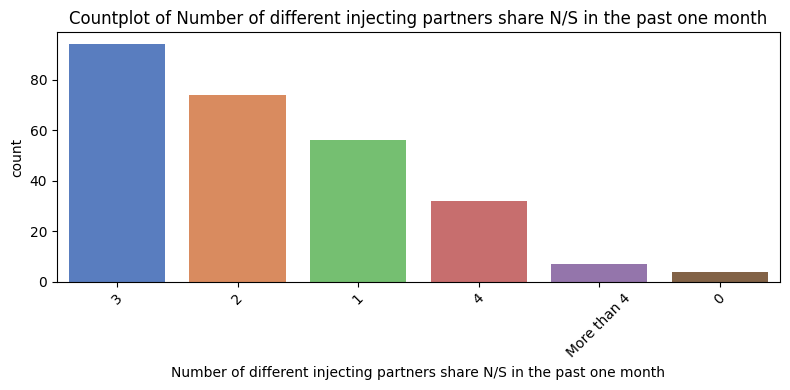

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


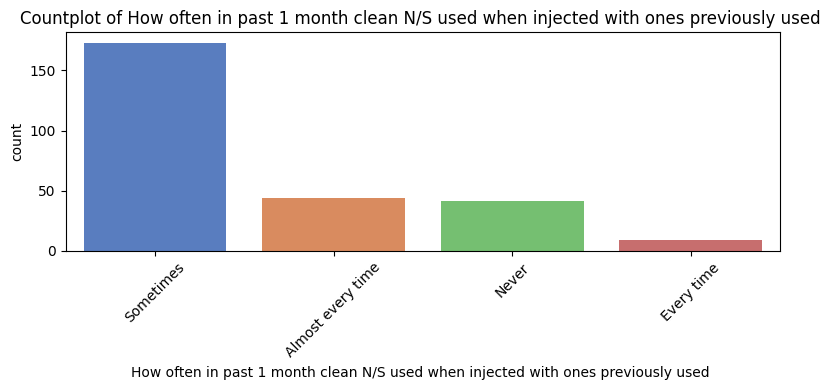

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


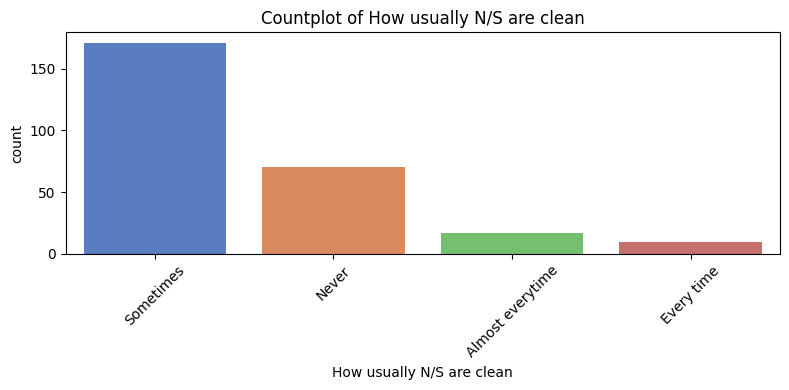

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


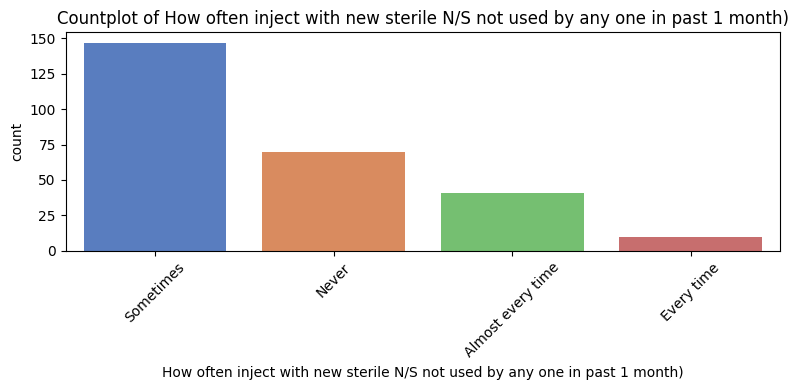

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


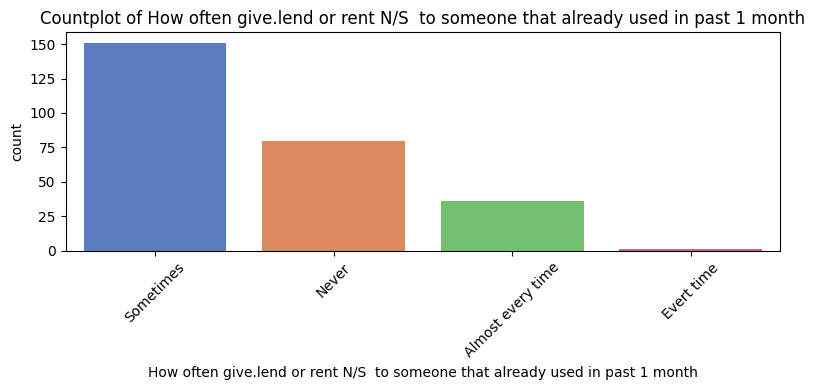

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


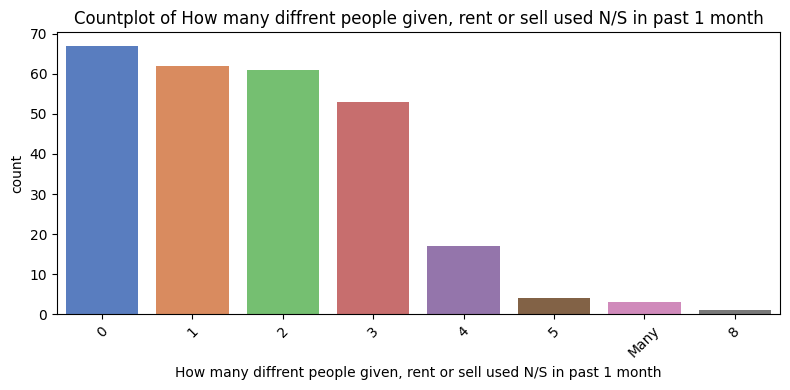

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


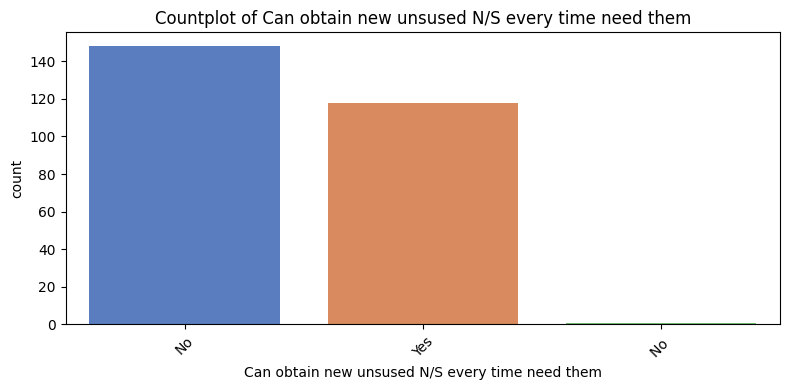

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


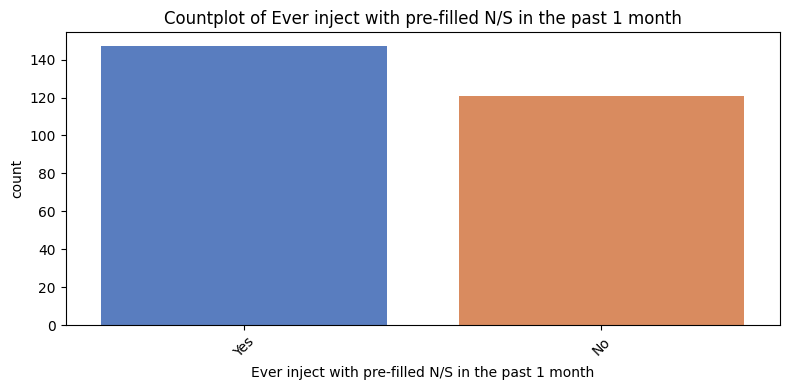

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


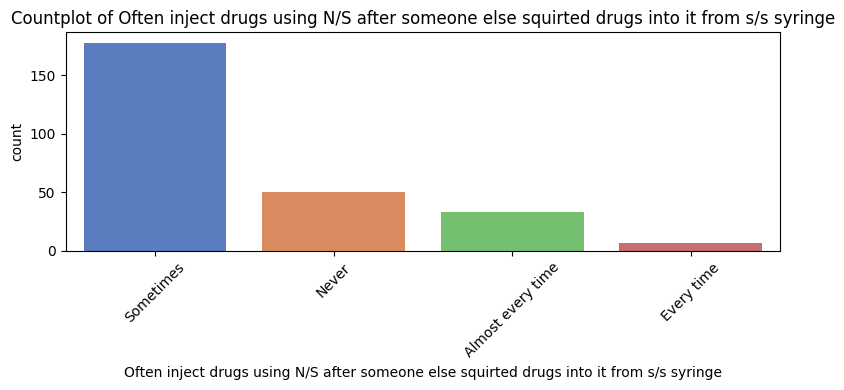

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


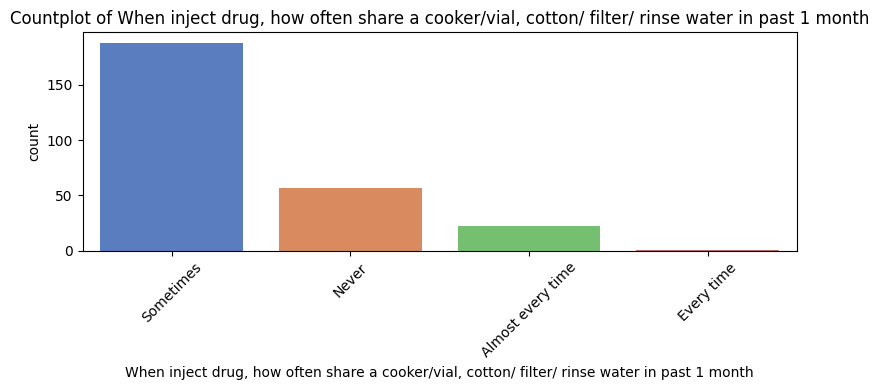

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


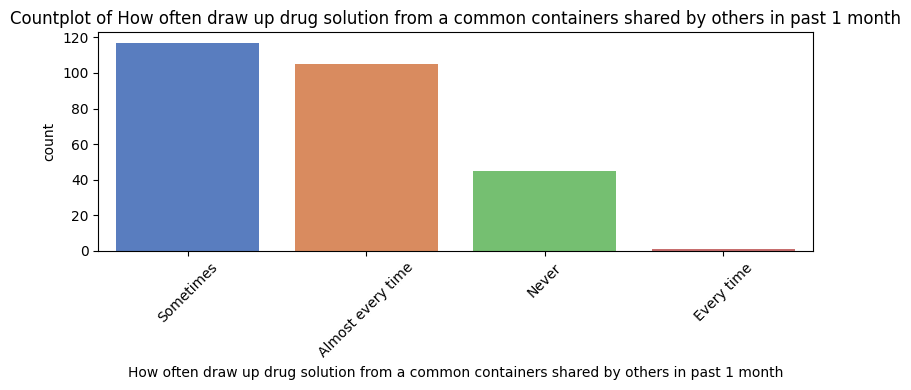

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


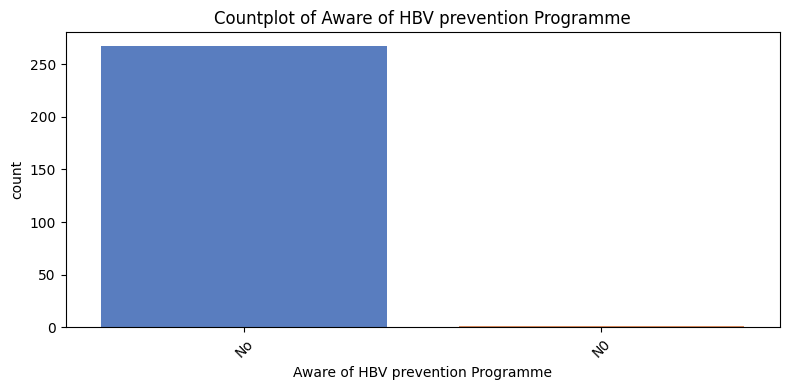

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


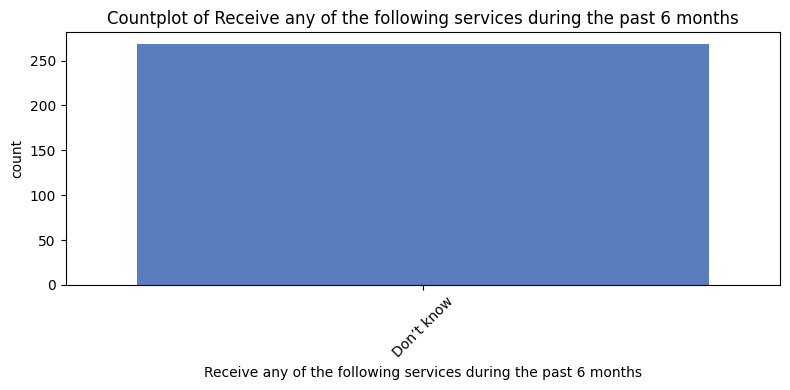

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


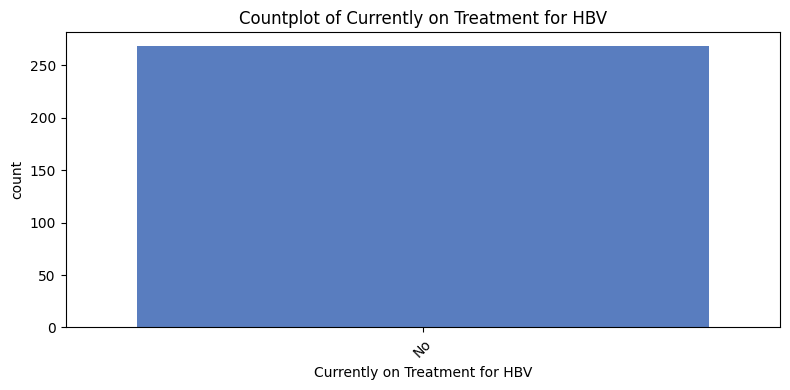

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


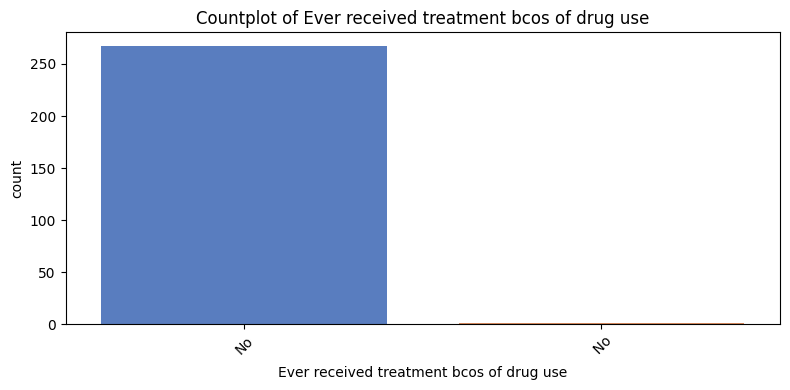

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


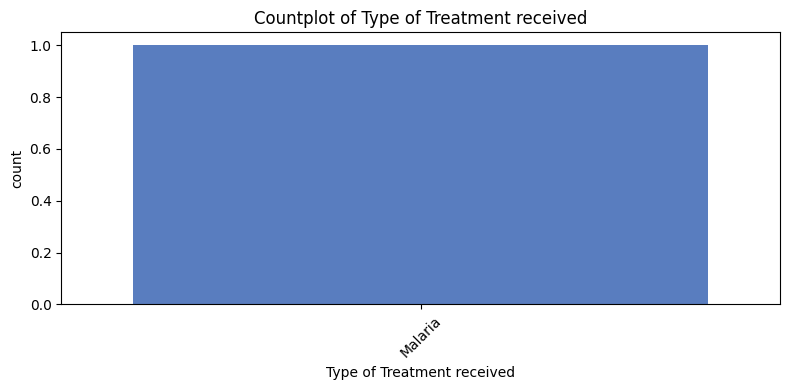

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


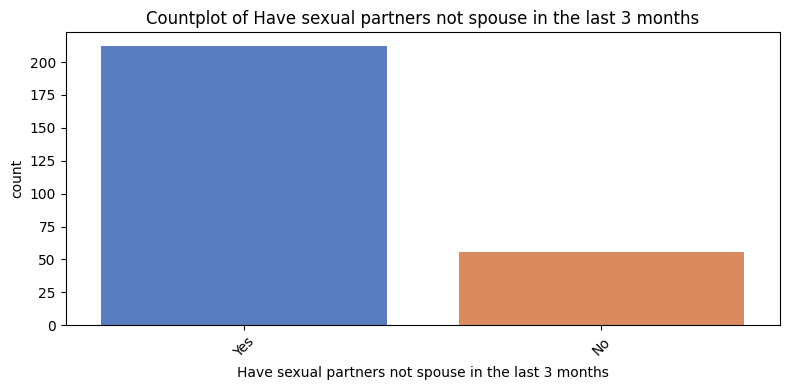

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


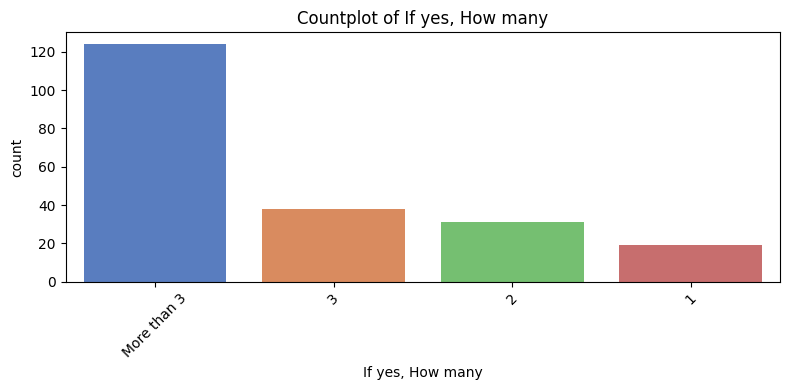

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


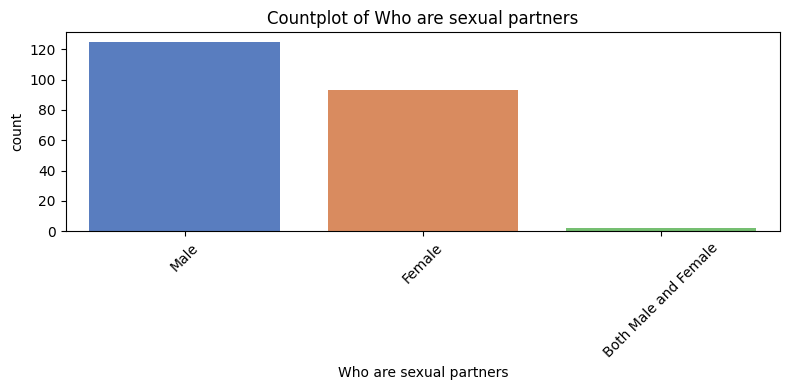

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


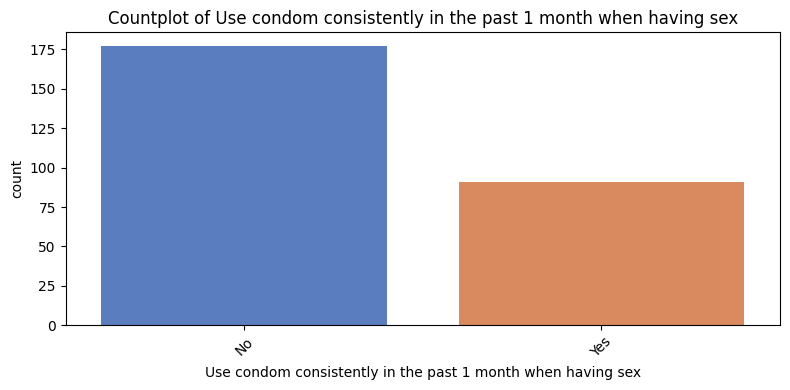

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


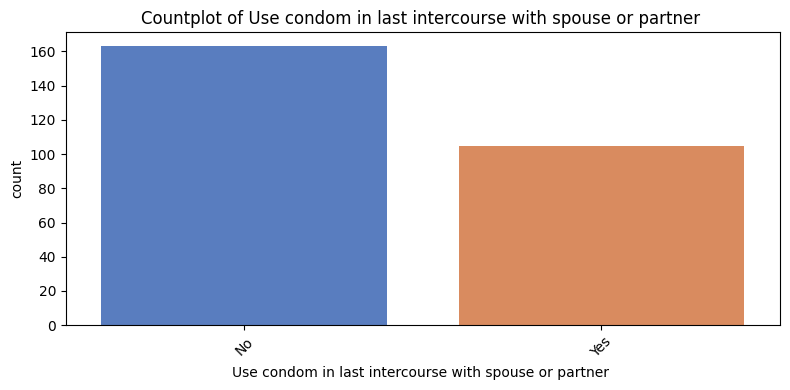

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


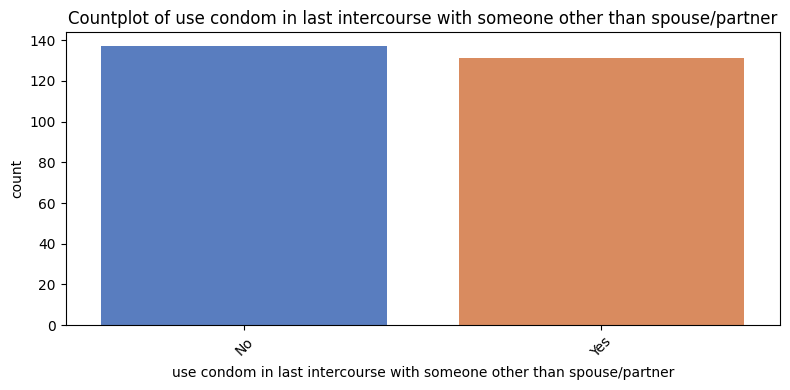

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


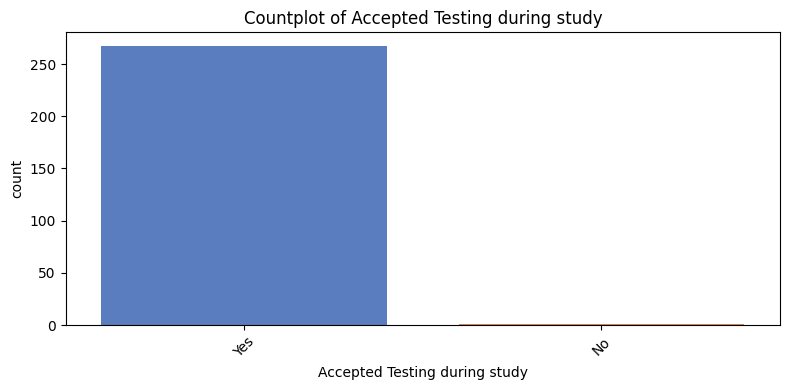

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


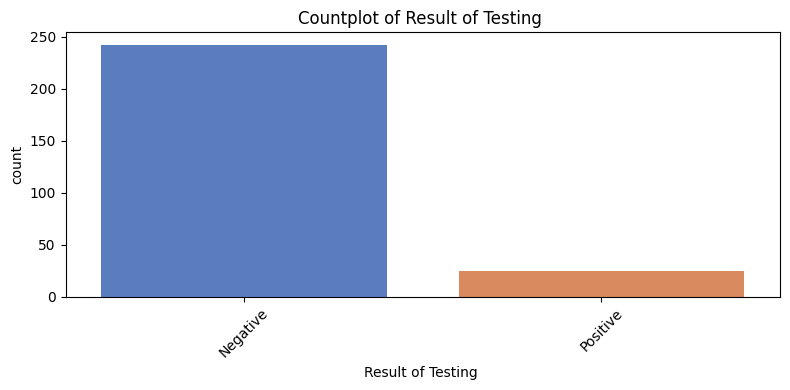

/tmp/ipython-input-28-850142038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)


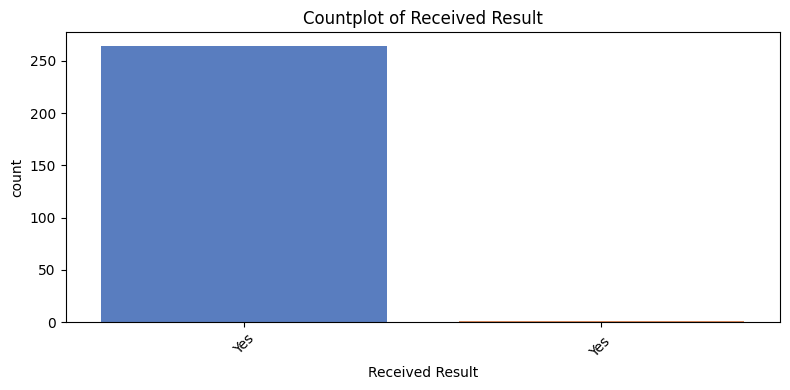

In [ ]:
# --- Countplots for Categorical Variables ---
for col in categorical_cols:
    if df[col].nunique() < 10:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, palette="muted", order=df[col].value_counts().index)
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
# Define more flexible mapping based on actual values
positive_vals = ['positive', 'Positive', 'POSITIVE', '1', 'Yes', 'Detected']
negative_vals = ['negative', 'Negative', 'NEGATIVE', '0', 'No', 'Undetected']

df = df[df['Result of Testing'].notna()].copy()
df['Result of Testing'] = df['Result of Testing'].str.strip()

# Map using lowercase matching
df['Result of Testing'] = df['Result of Testing'].str.lower().map(
    lambda x: 1 if x in [v.lower() for v in positive_vals] else (
        0 if x in [v.lower() for v in negative_vals] else np.nan
    )
)

# Drop rows where mapping failed (i.e., invalid labels)
df = df[df['Result of Testing'].notna()]
print(f"✅ Rows after remapping and dropping invalids: {df.shape[0]}")


✅ Rows after remapping and dropping invalids: 0


In [ ]:
# Load again and inspect
df = pd.read_excel("/content/drive/MyDrive/Hep B Predictors in PWIDs.xlsx")
df.columns = df.columns.str.strip()

# Check what's in the raw column
print("Unique values in 'Result of Testing':")
print(df['Result of Testing'].unique())


Unique values in 'Result of Testing':
['Positive' 'Negative' nan]


In [58]:
# Step 1: Normalize values in 'Result of Testing'
df['Result of Testing'] = df['Result of Testing'].astype(str).str.strip().str.lower()

# Step 2: Define valid mappings
positive_vals = ['positive', 'pos', '1', 'yes', 'detected']
negative_vals = ['negative', 'neg', '0', 'no', 'undetected']

# Step 3: Map to binary
df['Result of Testing'] = df['Result of Testing'].apply(
    lambda x: 1 if x in positive_vals else (0 if x in negative_vals else np.nan)
)

# Step 4: Drop rows where mapping failed
df = df[df['Result of Testing'].notna()].copy()

# Final check
print("✅ Distribution after cleaning:")
print(df['Result of Testing'].value_counts())


✅ Distribution after cleaning:
Result of Testing
0.0    242
1.0     25
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['How many months ago received treatment for drug use']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['How many months ago received treatment for drug use']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


✅ Accuracy: 0.9814814814814815
✅ Confusion Matrix:
 [[49  0]
 [ 1  4]]
✅ Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        49
         1.0       1.00      0.80      0.89         5

    accuracy                           0.98        54
   macro avg       0.99      0.90      0.94        54
weighted avg       0.98      0.98      0.98        54



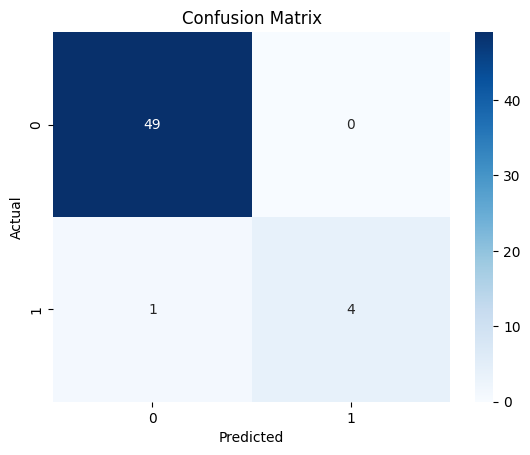

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
df = pd.read_excel("/content/drive/MyDrive/Hep B Predictors in PWIDs.xlsx")
df.columns = df.columns.str.strip()  # Clean column names

# Step 2: Clean target variable
df['Result of Testing'] = df['Result of Testing'].astype(str).str.strip().str.lower()
positive_vals = ['positive', 'pos', '1', 'yes', 'detected']
negative_vals = ['negative', 'neg', '0', 'no', 'undetected']
df['Result of Testing'] = df['Result of Testing'].apply(
    lambda x: 1 if x in positive_vals else (0 if x in negative_vals else np.nan)
)
df = df[df['Result of Testing'].notna()].copy()

# Step 3: Split features and target
X = df.drop(columns=['Result of Testing'])
y = df['Result of Testing']

# Step 4: Identify types
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 5: Ensure all categorical columns are strings
for col in cat_cols:
    X[col] = X[col].astype(str)

# Step 6: Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Step 7: Final pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Step 8: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 9: Train model
clf.fit(X_train, y_train)

# Step 10: Predict and evaluate
y_pred = clf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
